## Exploratory Data Analysis for Baseball Database

The main purpose is to gain an overview of the dataset. Identify problems in the dataset that need to be corrected. Identify outliers and consider if these are real or erros in the dataset.

The exploratory data analysis (EDA) process will help firm up which dependent variables should be used to investigate independent variables and how the former depends on the latter.

The theme of this investigation is to ask if geographical location has an affect, if where a person was born, where the college was located has an impact on a dependent variable (e.g. Salary of player).

In [1]:
from __future__ import print_function
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from ballbase import figures

# Config the matplotlib backend as plotting inline in IPython
%matplotlib inline

In [2]:
import Baseball_data_investigation
df = Baseball_data_investigation.main()
df.head()

Processed hall of fame data

Processed All Star data

Processed Player Awards data

Processed Salary data

Processed college locations

Processed master file
master_merge is ready
data audit complete


,birthYear,birthMonth,birthDay,birthCountry,birthState,birthCity,deathYear,deathMonth,deathDay,deathCountry,...,max_salary,min_salary,mean_salary_standardized_annually,max_salary_standardized_annually,min_salary_standardized_annually,mode_schoolID,college_name_full,college_city,college_state,college_country
playerID,,,,,,,,,,,,,,,,,,,,,
aardsda01,1981.0,12.0,27.0,USA,CO,Denver,NaN,NaN,NaN,NaN,...,4500000.0,300000.0,-0.440097,0.260102,-0.670224,rice,Rice University,Houston,TX,USA
abadan01,1972.0,8.0,25.0,USA,FL,Palm Beach,NaN,NaN,NaN,NaN,...,327000.0,327000.0,-0.663649,-0.663649,-0.663649,gamiddl,Middle Georgia College,Cochran,GA,USA
abbeybe01,1869.0,11.0,11.0,USA,VT,Essex,1962.0,6.0,11.0,USA,...,NaN,NaN,NaN,NaN,NaN,vermont,University of Vermont,Burlington,VT,USA
abbotje01,1972.0,8.0,17.0,USA,GA,Atlanta,NaN,NaN,NaN,NaN,...,300000.0,175000.0,-0.644164,-0.598825,-0.690417,kentucky,University of Kentucky,Lexington,KY,USA
abbotji01,1967.0,9.0,19.0,USA,MI,Flint,NaN,NaN,NaN,NaN,...,2775000.0,68000.0,0.273098,1.275547,-0.814658,michigan,University of Michigan,Ann Arbor,MI,USA


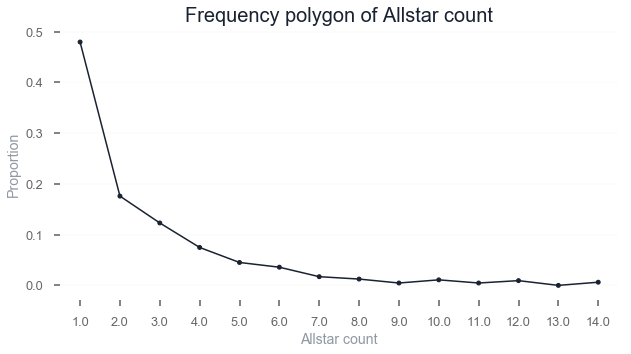

In [3]:
custom = ['#192231','#3C3C3C','#CDCDCD', '#494E6B']
ToddTerje = ['#F24C4E', '#EAB126', '#1FB58F', '#1B7B34']

def frequency_polygon(x, name, categorical_v=None, color_set=custom, proportion=False, ax_size=(10, 5), funky=False, formatting_right=True, x_truncation_upper=None, x_truncation_lower=None, ax=None):
    """Returns a frequency polygon
    plot which can be used with catergorical
    data to show difference between categories.
    """
    
    if funky:
        color_set = ToddTerje
    
    figures.common_set_up(ax_size)
    
    x_max = x.max()
    x_min = x.min()
    bin_n = int(x_max)-int(x_min)

    # Get height and a position form a histogram
    # to be turned into point for frequency polygon
    y, bin_bounds=np.histogram(x, bins=bin_n)
    bin_edge = bin_bounds[:-1]

    if proportion:
        x_size = len(x)
        y = y/x_size
        y_str = "Proportion"
    else:
        y_str = "Frequency"
    
    fig = sns.pointplot(bin_edge, y, color='#192231', scale=0.3, marker='.')
    
    title_color = '#192231'
    font_colour = '#9099A2'

    # Do not add a title in a multi-figure plot.
    #
    # Title will be added to figure with all sub-plots
    # instead in this case
    if ax is None: 
        fig.set_title(('Frequency polygon of {0}'.format(name)),
                    fontsize=20, color=title_color)
    fig.set_xlabel('{0}'.format(name),
                   color=font_colour)
    fig.set_ylabel(y_str.format(name),
                   color=font_colour)

    # Limit the x axis by truncating
    if x_truncation_upper or x_truncation_lower:
        axes = fig.axes
        fig.set_xlim(x_truncation_lower, x_truncation_upper)
        # To be communicated back in Formatting notes
        x_truncation_upper_str = 'x axis truncated by {0}\n'.format(x_truncation_upper)
        x_truncation_lower_str = 'x axis truncated after {0}\n'.format(x_truncation_lower)

        parameters = ('Formatting:\n'
                    + x_truncation_lower_str
                    + x_truncation_upper_str)

        fig = figures.formatting_text_box(fig, parameters, formatting_right)
    
    # Will not work on multiple subplots within a figure
    if ax is None:
        # Seaborn despine to remove boundaries around plot
        sns.despine(offset=2, trim=True, left=True, bottom=True)

admc = frequency_polygon(df['allstar_count'].dropna(), "Allstar count", proportion=True)



In [5]:
df2 = df[["allstar_count", "birthState"]].dropna().copy()
dfs = {value: rows for value, rows in df2.groupby('birthState')}
dfs

{'AK':            allstar_count birthState
 playerID                           
 schilcu01            6.0         AK, 'AL':            allstar_count birthState
 playerID                           
 ageeto01             2.0         AL
 benedbr01            2.0         AL
 bollifr01            4.0         AL
 brantje01            1.0         AL
 davenji01            2.0         AL
 fostege01            5.0         AL
 jacksbo01            1.0         AL
 keyji01              4.0         AL
 klubeco01            1.0         AL
 laryfr01             3.0         AL
 roberda08            1.0         AL
 sewellu01            1.0         AL
 sewelri01            4.0         AL
 smithoz01           15.0         AL
 suttodo01            4.0         AL
 vealebo01            2.0         AL, 'AR':            allstar_count birthState
 playerID                           
 brocklo01            6.0         AR
 frankry01            1.0         AR
 jacksra01            2.0         AR
 kessido01          

In [24]:
df.isnull().values.any()

True

### Univariate exploratory data analysis

count    6575.000000
mean     1947.320152
std        33.161191
min      1845.000000
25%      1924.000000
50%      1958.000000
75%      1973.000000
max      1993.000000
Name: birthYear, dtype: float64

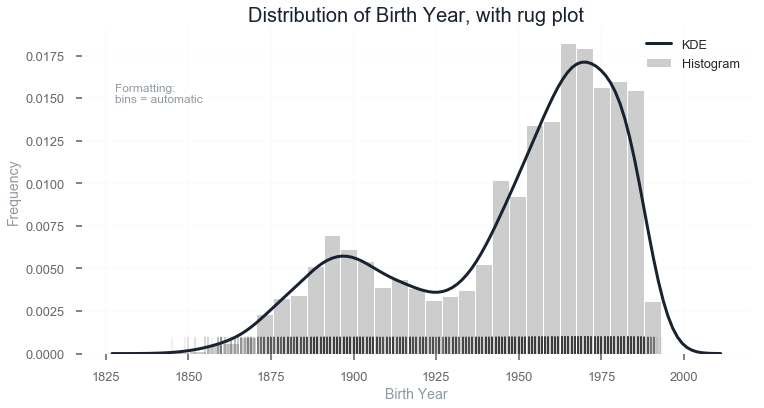

In [6]:
fig_7 = figures.univariate(df['birthYear'].dropna(), 'Birth Year', bin_n=None, formatting_right=False)
df['birthYear'].dropna().describe()

count    18973.000000
mean      1931.435356
std         41.555514
min       1820.000000
25%       1895.000000
50%       1937.000000
75%       1969.000000
max       1996.000000
Name: birthYear, dtype: float64

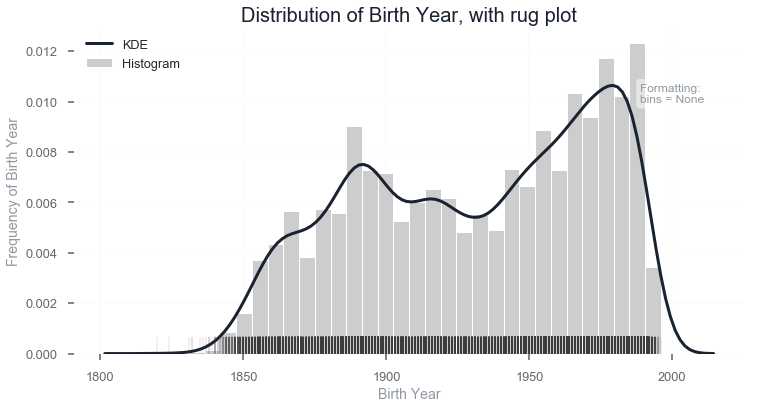

In [3]:
fig_7 = figures.univariate(df['birthYear'].dropna(), 'Birth Year', bin_n=None, formatting_right=False)
df['birthYear'].dropna().describe()

count    473.000000
mean       4.209302
std        5.350487
min        1.000000
25%        1.000000
50%        2.000000
75%        5.000000
max       47.000000
Name: award_count, dtype: float64

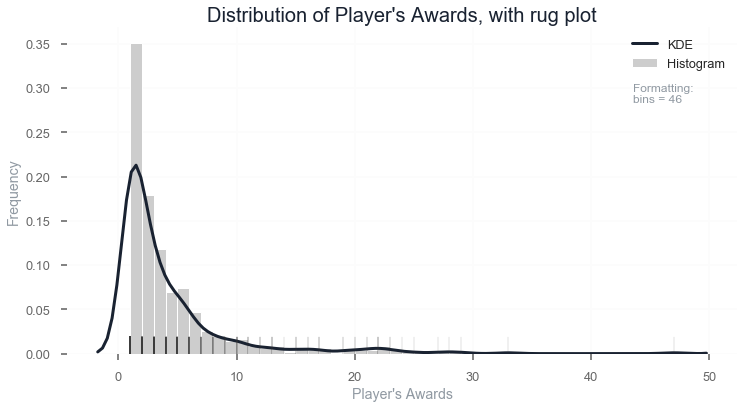

In [7]:
fig_1 = figures.univariate(df['award_count'].dropna(), 'Player\'s Awards')
df['award_count'].dropna().describe()

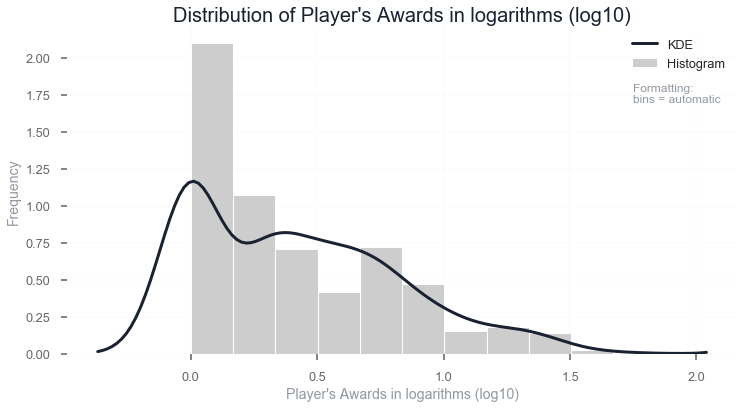

In [8]:
figures.univariate_overdispersed(df['award_count'].dropna(), 'Player\'s Awards', bin_n=None)

count    1774.000000
mean        2.901917
std         2.927680
min         1.000000
25%         1.000000
50%         2.000000
75%         4.000000
max        25.000000
Name: allstar_count, dtype: float64

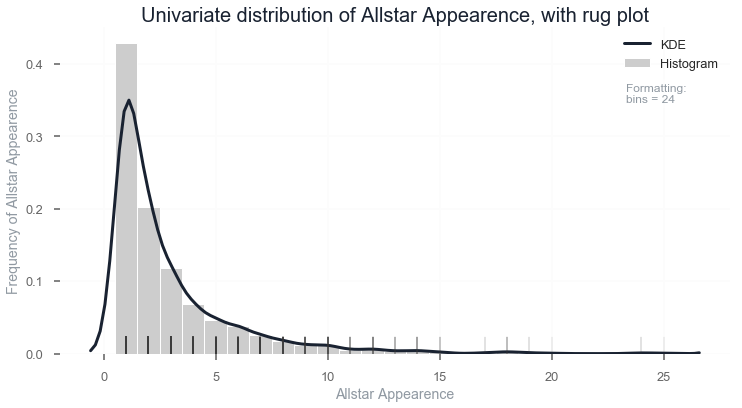

In [4]:
fig_2 = figures.univariate(df['allstar_count'].dropna(), 'Allstar Appearence')
df['allstar_count'].dropna().describe()

count    5155.000000
mean        0.054906
std         1.097218
min        -1.212567
25%        -0.644390
50%        -0.507863
75%         0.360500
max         7.489766
Name: max_salary_standardized_annually, dtype: float64

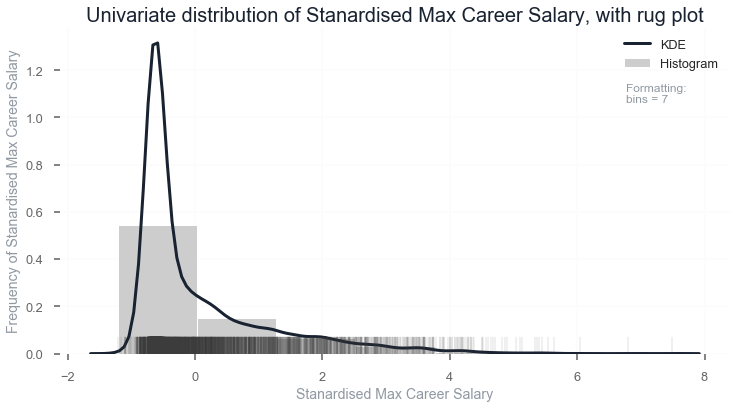

In [7]:
fig_3 = figures.univariate(df['max_salary_standardized_annually'].dropna(), 'Stanardised Max Career Salary', bin_n=None)
df['max_salary_standardized_annually'].dropna().describe()

count    5155.000000
mean       -0.650137
std         0.271276
min        -1.212567
25%        -0.712534
50%        -0.671235
75%        -0.644166
max         3.925495
Name: min_salary_standardized_annually, dtype: float64

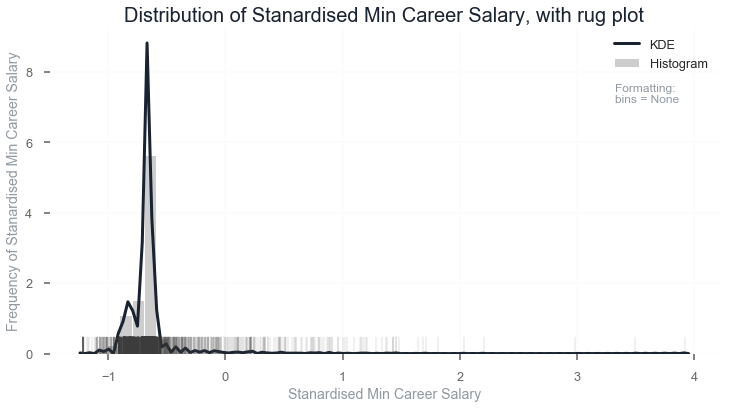

In [5]:
fig_4 = figures.univariate(df['min_salary_standardized_annually'].dropna(), 'Stanardised Min Career Salary', bin_n=None)
df['min_salary_standardized_annually'].dropna().describe()

count    5155.000000
mean       -0.319813
std         0.595574
min        -1.212567
25%        -0.656584
50%        -0.590689
75%        -0.223479
max         4.268085
Name: mean_salary_standardized_annually, dtype: float64

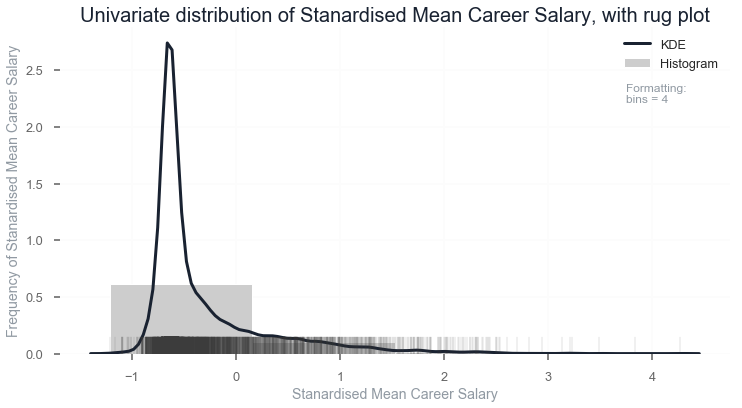

In [9]:
fig_5 = figures.univariate(df['mean_salary_standardized_annually'].dropna(), 'Stanardised Mean Career Salary', bin_n=None)
df['mean_salary_standardized_annually'].dropna().describe()

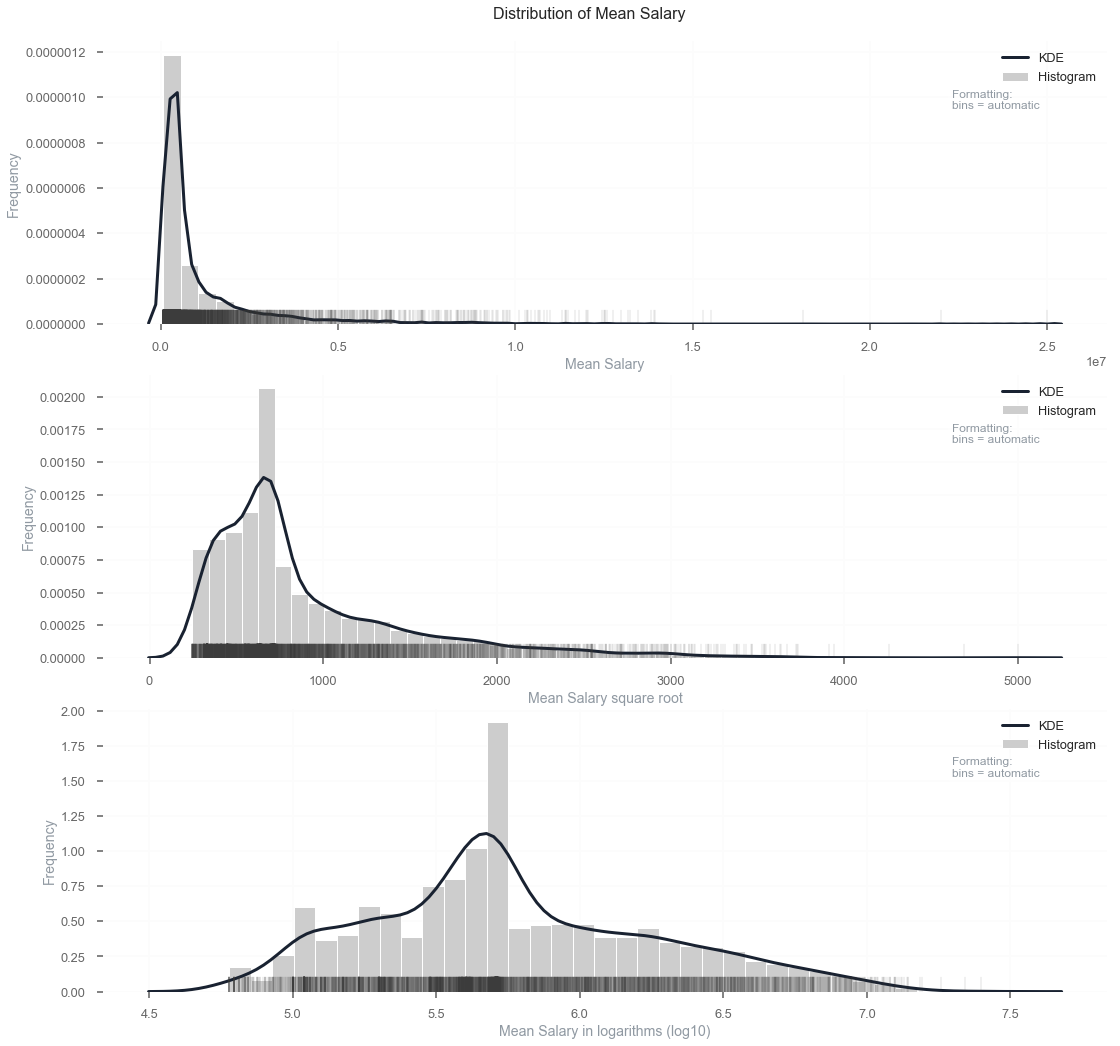

In [26]:
fig_a = figures.dist_transform_plot(df['mean_salary'].dropna(), 'Mean Salary', bin_n=None)

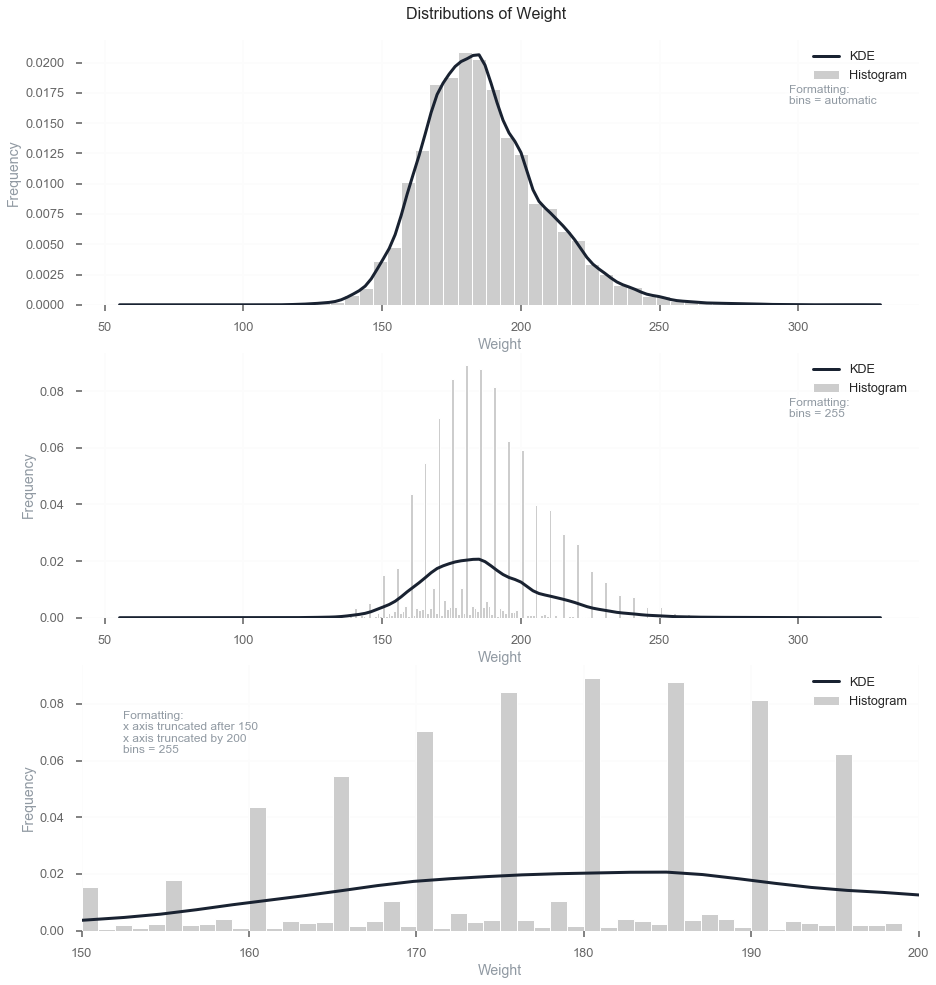

In [10]:
# Unable to turn this into a function at the moment
figsize = (15, 15)
# Needed to set up figure style
figures.common_set_up(figsize)

fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=figsize)

fig.suptitle("Distributions of Weight", fontsize=16)
fig.subplots_adjust(hspace=0.18, top=0.95)

figures.univariate(df['weight'].dropna(), 'Weight', rug=False, bin_n=None, ax=ax1)
figures.univariate(df['weight'].dropna(), 'Weight', rug=False, ax=ax2)
figures.univariate(df['weight'].dropna(), 'Weight', rug=False, 
                   x_truncation_upper=200, x_truncation_lower=150, 
                   formatting_right=False, ax=ax3)

sns.despine(offset=2, trim=True, left=True, bottom=True)

count    18251.000000
mean       186.375596
std         21.524765
min         65.000000
25%        170.000000
50%        185.000000
75%        200.000000
max        320.000000
Name: weight, dtype: float64

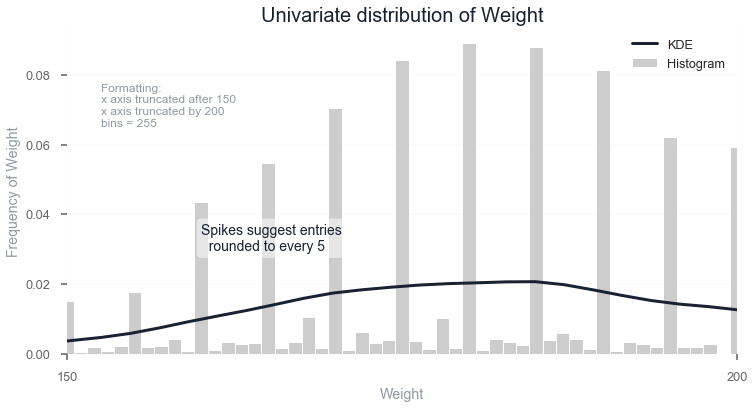

In [9]:
fig_8 = figures.univariate(df['weight'].dropna(), 'Weight', rug=False, x_truncation_upper=200, x_truncation_lower=150, formatting_right=False)

annot = "Spikes suggest entries\n  rounded to every 5"
fig_8 = figures.annotation_text(fig_8, annot, 0.4, 0.2, strong_colour=True, font_size=14)

df['weight'].dropna().describe()

count    18251.000000
mean       186.375596
std         21.524765
min         65.000000
25%        170.000000
50%        185.000000
75%        200.000000
max        320.000000
Name: weight, dtype: float64

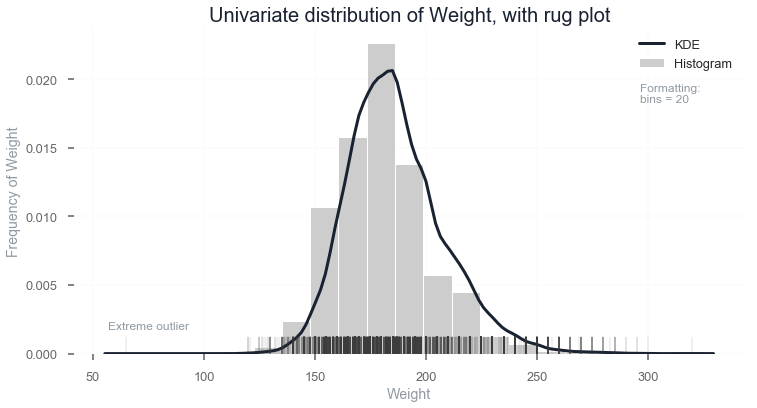

In [6]:
fig_8 = figures.univariate(df['weight'].dropna(), 'Weight', rug=True, bin_n= 20)

annot = "Extreme outlier"
fig_8 = figures.annotation_text(fig_8, annot, 0.1, 0.05, strong_colour=False, font_size=12)

df['weight'].dropna().describe()

count    18320.000000
mean        72.273799
std          2.603904
min         43.000000
25%         71.000000
50%         72.000000
75%         74.000000
max         83.000000
Name: height, dtype: float64

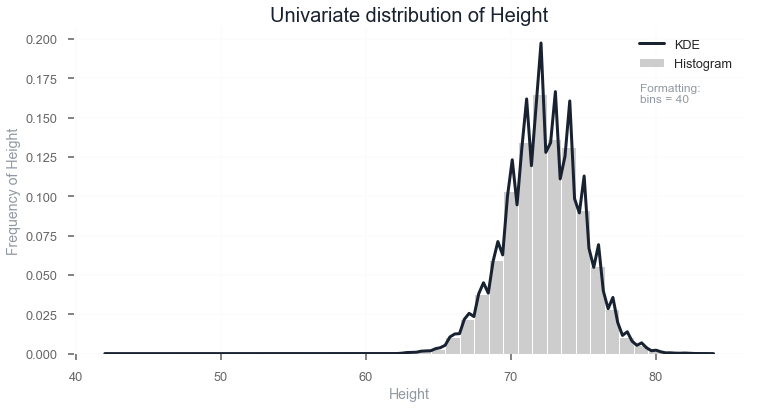

In [3]:
fig_9 = figures.univariate(df['height'].dropna(), 'Height', rug=False)
df['height'].dropna().describe()

## Bivariate distributions

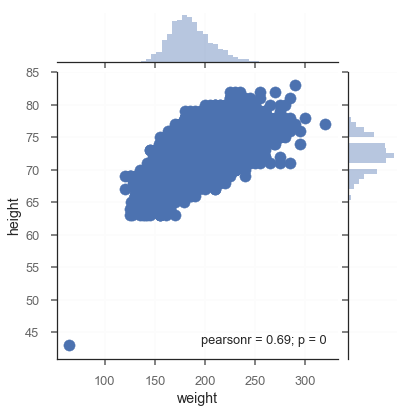

In [13]:
sns.jointplot(x=df['weight'].dropna(), y=df['height'].dropna())

### Binary plots

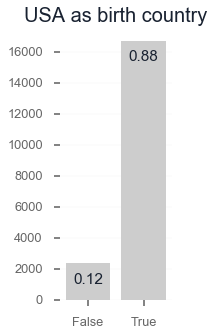

In [5]:
fig_c2 = figures.boolean_bar(df['birthCountry'].dropna()=='USA', 'USA as birth country')

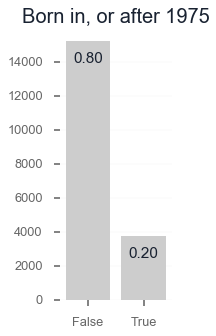

In [13]:
fig_c2 = figures.boolean_bar(df['birthYear'].dropna() >= 1975, 'Born in, or after 1975')

## Categorical data

In [14]:
columns = list(df.columns.values)
print(columns)

['playerID', 'yearid', 'votedBy', 'ballots', 'needed', 'votes', 'inducted', 'category', 'needed_note', 'allstar_count', 'award_count', 'mean_salary', 'max_salary', 'min_salary', 'mean_salary_standardized_annually', 'max_salary_standardized_annually', 'min_salary_standardized_annually', 'mode_schoolID', 'name_full', 'city', 'state', 'country', 'playerID', 'birthYear', 'birthMonth', 'birthDay', 'birthCountry', 'birthState', 'birthCity', 'deathYear', 'deathMonth', 'deathDay', 'deathCountry', 'deathState', 'deathCity', 'nameFirst', 'nameLast', 'nameGiven', 'weight', 'height', 'bats', 'throws', 'debut', 'finalGame', 'retroID', 'bbrefID']


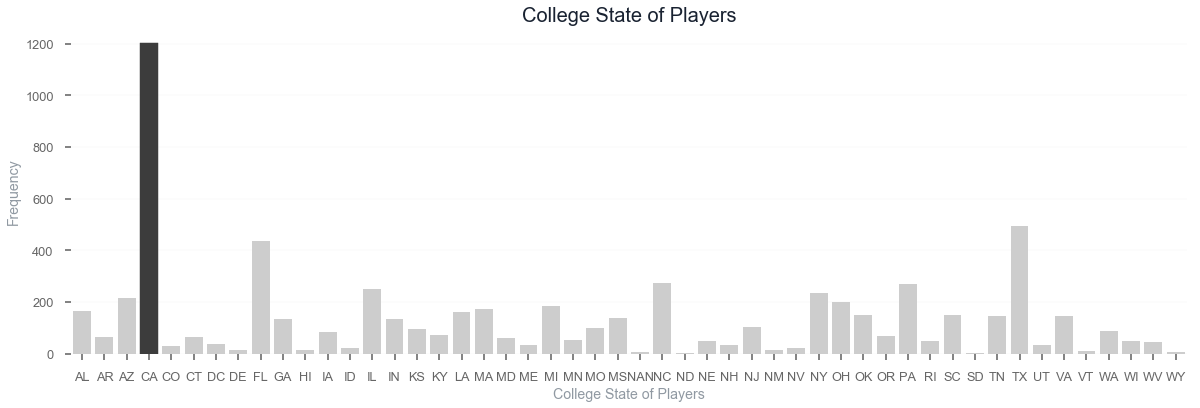

In [4]:
fig_c3 = figures.count_bar((df.sort_values(['state'])      # Sort by birthState
                           ['state']),                     # Display state of college
                           "College State of Players",
                            highlight=3);

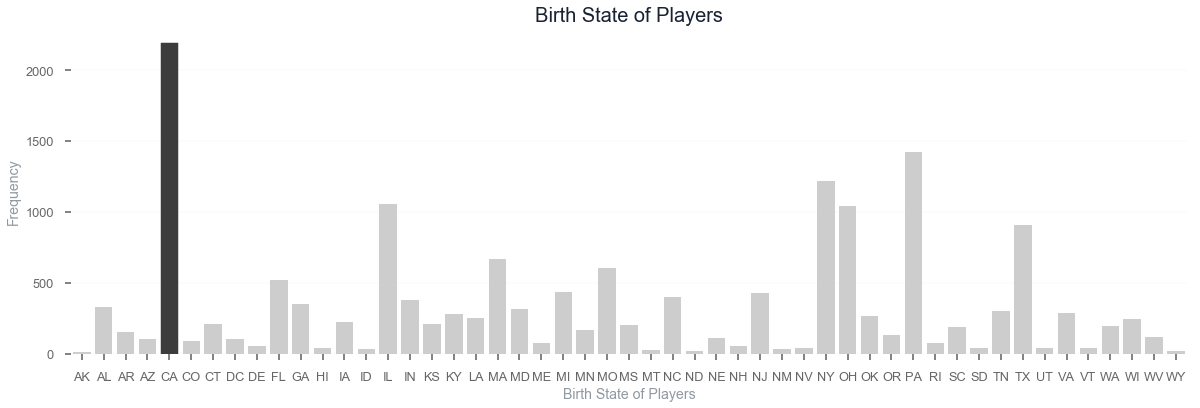

In [7]:
# df where birthCountry == USA, sort on birthState then display birthState
fig_c4 = figures.count_bar((
                            df[                              # From DataFrame
                                df['birthCountry'] == 'USA'  # Select only USA as birthCountry
                               ].sort_values(['birthState']) # Sort by birthState
                          ['birthState']),                   # Display birthState
                          'Birth State of Players',
                          highlight=4
                          );

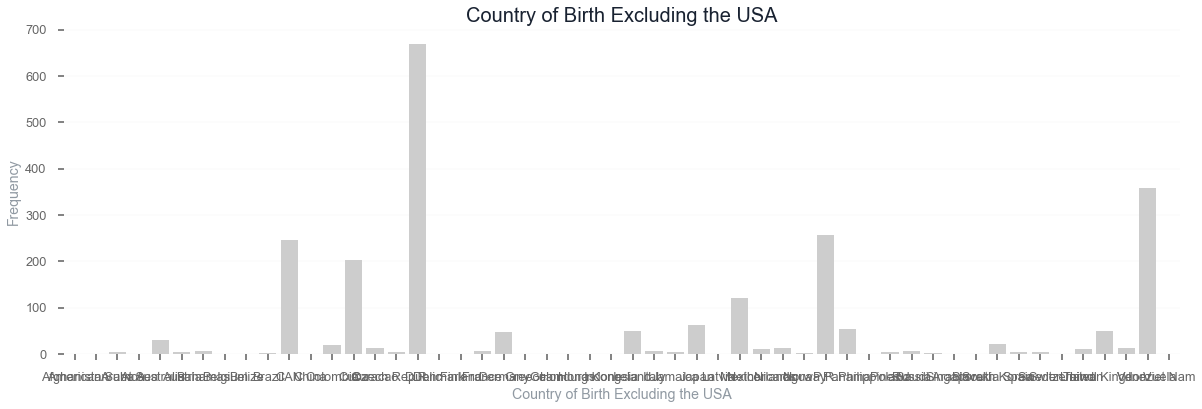

In [8]:
fig_c3 = figures.count_bar((
                            df[                                  # From DataFrame
                                df['birthCountry'] != 'USA'      # Select all that are not USA as birthCountry
                               ].sort_values(['birthCountry'])   # Sort by birthCountry
                            ['birthCountry']),                   # Display state of college
                           "Country of Birth Excluding the USA",
                            highlight=None);

In [20]:
series_x = df.sort_values(['state'])['state'].dropna()
series_y = df[df['birthCountry'] == 'USA'].sort_values(['birthState'])['birthState']